# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate?

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates# to get the intermediary tick lines to show on the visual

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [2]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')
df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')
df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li>
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [3]:
# the Tesla dataframe has 124 rows, 3 columns
print(f'The shape of the Tesla dataframe is as follows: {df_tesla.shape}.')
# the Bitcoin Search dataframe has 73 rows, 2 columns
print(f'The shape of the Bitcoin Search dataframe is as follows: {df_btc_search.shape}.')
# the Bitcoin Price dataframe has 2204 rows, 3 columns
print(f'The shape of the Bitcoin Price dataframe is as follows: {df_btc_price.shape}.')
# the Unemployment dataframe has 181 rows, 3 columns
print(f'The shape of the unemployment dataframe is as follows: {df_unemployment.shape}.')

The shape of the Tesla dataframe is as follows: (124, 3).
The shape of the Bitcoin Search dataframe is as follows: (73, 2).
The shape of the Bitcoin Price dataframe is as follows: (2204, 3).
The shape of the unemployment dataframe is as follows: (181, 3).


In [4]:
#What are the column names?
print(f"The columns within the Tesla dataframe are: {', '.join(df_tesla.columns)}")
print(f"The columns within the Bitcoin Search dataframe are: {', '.join(df_btc_search)}")
print(f"The columns within the Bitcoin Price dataframe are: {', '.join(df_btc_price)}")
print(f"The columns within the Unemployment dataframe are: {', '.join(df_unemployment)}")

The columns within the Tesla dataframe are: MONTH, TSLA_WEB_SEARCH, TSLA_USD_CLOSE
The columns within the Bitcoin Search dataframe are: MONTH, BTC_NEWS_SEARCH
The columns within the Bitcoin Price dataframe are: DATE, CLOSE, VOLUME
The columns within the Unemployment dataframe are: MONTH, UE_BENEFITS_WEB_SEARCH, UNRATE


In [5]:
TSLA_MaxSearch = df_tesla['TSLA_WEB_SEARCH'].max()
TSLA_MinSearch = df_tesla['TSLA_WEB_SEARCH'].min()
print(f'Largest value for Tesla in Web Search: {TSLA_MaxSearch}')
print(f'Smallest value for Tesla in Web Search: {TSLA_MinSearch}')
BTC_MaxSearch = df_btc_search['BTC_NEWS_SEARCH'].max()
BTC_MinSearch = df_btc_search['BTC_NEWS_SEARCH'].min()
print(f'Largest value for Bitcoin in News Search: {BTC_MaxSearch}')
print(f'Smallest value for Bitcoin in News Search: {BTC_MinSearch}')
BTC_MaxPrice = df_btc_price['CLOSE'].max()
BTC_MinPrice = df_btc_price['CLOSE'].min()
print(f'Largest value for Bitcoin Close Price: {BTC_MaxPrice}')
print(f'Smallest value for Bitcoin Close Price: {BTC_MinPrice}')
Unemployment_MaxSearch = df_unemployment['UE_BENEFITS_WEB_SEARCH'].max()
Unemployment_MinSearch = df_unemployment['UE_BENEFITS_WEB_SEARCH'].min()
print(f'Largest value for Unemployment in Web Search: {Unemployment_MaxSearch}')
print(f'Smallest value for Unemployment in Web Search: {Unemployment_MinSearch}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2
Largest value for Bitcoin in News Search: 100
Smallest value for Bitcoin in News Search: 3
Largest value for Bitcoin Close Price: 19497.400391
Smallest value for Bitcoin Close Price: 178.102997
Largest value for Unemployment in Web Search: 100
Smallest value for Unemployment in Web Search: 14


In [6]:
#use the .describe() method to see some descriptive analysis
# df_tesla.describe()
# df_btc_search.describe()
# df_btc_price.describe()
df_unemployment.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


In [7]:
# The columns within the Tesla dataframe are: MONTH, TSLA_WEB_SEARCH, TSLA_USD_CLOSE
# The columns within the Bitcoin Search dataframe are: MONTH, BTC_NEWS_SEARCH
# The columns within the Bitcoin Price dataframe are: DATE, CLOSE, VOLUME
# The columns within the Unemployment dataframe are: MONTH, UE_BENEFITS_WEB_SEARCH, UNRATE
print('Based upon the columns in the dataframes, the following is a list of the periodicity associated with each of the dataframes:\nTesla: Monthly \nBitcoin Search: Monthly \nBitcoin Price: Daily \nUnemployment: Monthly')

Based upon the columns in the dataframes, the following is a list of the periodicity associated with each of the dataframes:
Tesla: Monthly 
Bitcoin Search: Monthly 
Bitcoin Price: Daily 
Unemployment: Monthly


In [8]:
#what does the value of 100 in the Google Trends search popularity actually mean?
# In Google Trends, a value of 100 signifies the peak popularity for a search term within a given time frame and location, meaning it represents the highest
# level of search interest relative to all other searches during that period; essentially, it's the most popular a term can be on the scale used by Google Trends.

### Unemployment Data

In [9]:
df_tesla
df_btc_search
df_btc_price
df_unemployment

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6
...,...,...,...
176,2018-09,14,3.7
177,2018-10,15,3.8
178,2018-11,16,3.7
179,2018-12,17,3.9


In [10]:
largest_unemployment_benefit = df_unemployment['UE_BENEFITS_WEB_SEARCH'].max()
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {largest_unemployment_benefit}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


### Bitcoin

In [11]:
#code created above, referenced here as well
print(f'largest BTC News Search: {BTC_MaxSearch}')

largest BTC News Search: 100


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [12]:
missing_values_tesla = df_tesla.isna().values.any() #none
missing_values_unemployment = df_unemployment.isna().values.any() #none
missing_values_btc_search = df_btc_search.isna().values.any()#none
missing_values_btc_price = df_btc_price.isna().values.any() # MISSING ONE RECORD

In [13]:
print(f'Missing values for Tesla?: {missing_values_tesla}')
print(f'Missing values for U/E?: {missing_values_unemployment}')
print(f'Missing values for BTC Search?: {missing_values_btc_search}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [14]:
print(f'Missing values for BTC price?: {missing_values_btc_price}')

Missing values for BTC price?: True


In [15]:
num_missing_values_btc_price = df_btc_price.isna().sum().sum() # MISSING ONE RECORD, TWO VALUES MISSING
print(f'Number of missing values: {num_missing_values_btc_price}')

Number of missing values: 2


**Challenge**: Remove any missing values that you found.

In [16]:
#drop rows associated with NaN values
df_btc_price_cleaned = df_btc_price.dropna()
#confirmed cleaning of new dataframe
df_btc_price_cleaned.isna().sum().sum()

0

### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [17]:
df_tesla.dtypes #MONTH field is an object
#convert to Datetime
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_tesla.dtypes #confirm MONTH field is Datetime

,0
MONTH,datetime64[ns]
TSLA_WEB_SEARCH,int64
TSLA_USD_CLOSE,float64


In [18]:
df_btc_price_cleaned.dtypes # DATE field is an object
#convert to Datetime
df_btc_price_cleaned.DATE = pd.to_datetime(df_btc_price_cleaned.DATE)
#confirm conversion
df_btc_price_cleaned.dtypes

<ipython-input-18-a6fd159163a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btc_price_cleaned.DATE = pd.to_datetime(df_btc_price_cleaned.DATE)


,0
DATE,datetime64[ns]
CLOSE,float64
VOLUME,float64


In [19]:
df_btc_search.dtypes #MONTH field is an object
#convert to Datetime
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)
#confirm conversion
df_btc_search.dtypes

,0
MONTH,datetime64[ns]
BTC_NEWS_SEARCH,int64


In [20]:
df_unemployment.dtypes #MONTH field is an object
#convert
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)
#confirm conversion
df_unemployment.dtypes

,0
MONTH,datetime64[ns]
UE_BENEFITS_WEB_SEARCH,int64
UNRATE,float64


### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [21]:
#since the Price data is daily, but the search data is monthly, we need to convert the price data, with 'M'onth intervals, on field 'DATE', using the last record
df_btc_price_monthly = df_btc_price_cleaned.resample('M', on='DATE').last()

In [22]:
print(df_btc_price_monthly.shape)

(73, 2)


In [23]:
df_btc_price_monthly.head()

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


# Data Visualisation

### Notebook Formatting & Style Helpers

In [24]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

In [25]:
# Register date converters to avoid warning messages;
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Tesla Stock Price v.s. Search Volume

Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'.

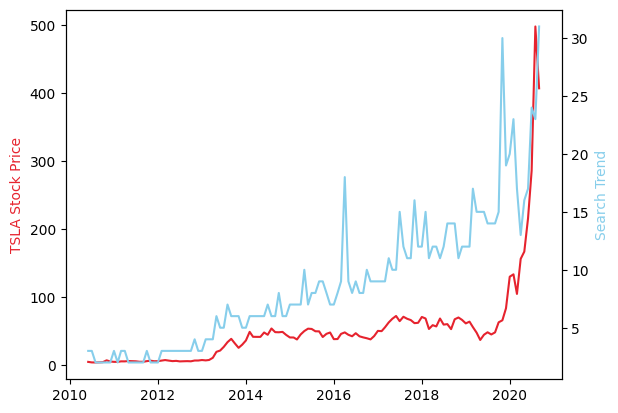

In [26]:
ax1 = plt.gca() #get current axis
ax2 = ax1.twinx()

ax1.set_ylabel('TSLA Stock Price',color="#E6232E")
ax2.set_ylabel('Search Trend',color="skyblue")

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE,color="#E6232E")
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH,color="skyblue")

(https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

**Challenge**: Make the chart larger and easier to read.
1. Increase the figure size (e.g., to 14 by 8).
2. Increase the font sizes for the labels and the ticks on the x-axis to 14.
3. Rotate the text on the x-axis by 45 degrees.
4. Make the lines on the chart thicker.
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html).
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html).
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

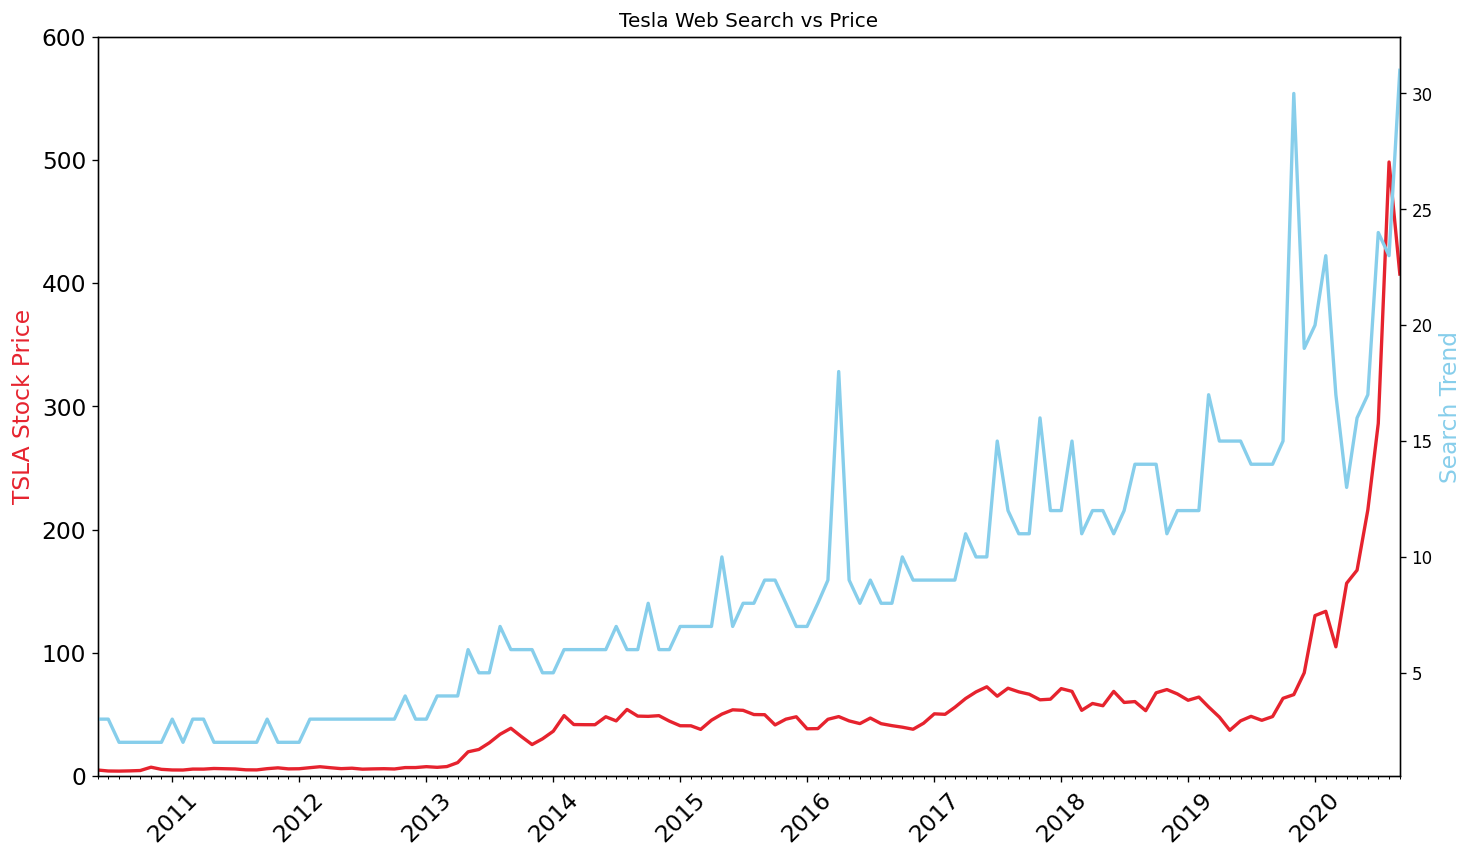

In [32]:
# Increase the figure size (e.g., to 14 by 8).
# Keep the chart looking sharp by changing the dots-per-inch or DPI value.
plt.figure(figsize=(14,8),dpi=120)
# Add a title that reads 'Tesla Web Search vs Price'
plt.title('Tesla Web Search vs Price')
# Rotate the text on the x-axis by 45 degrees.
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)


ax1 = plt.gca() #get current axis
ax2 = ax1.twinx()

# Increase the font sizes for the labels and the ticks on the x-axis to 14.
ax1.set_ylabel('TSLA Stock Price',color="#E6232E", fontsize=14)
ax2.set_ylabel('Search Trend',color="skyblue", fontsize=14)

# Set minimum and maximum values for the y and x axis.
ax1.set_ylim([0,600])
ax1.set_xlim([df_tesla.MONTH.min(),df_tesla.MONTH.max()])

# Make the lines on the chart thicker.
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE,color="#E6232E", linewidth=2)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH,color="skyblue", linewidth=2)

#format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# Finally use plt.show() to display the chart below the cell instead of relying on the automatic notebook output.
plt.show()

How to add tick formatting for dates on the x-axis.

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

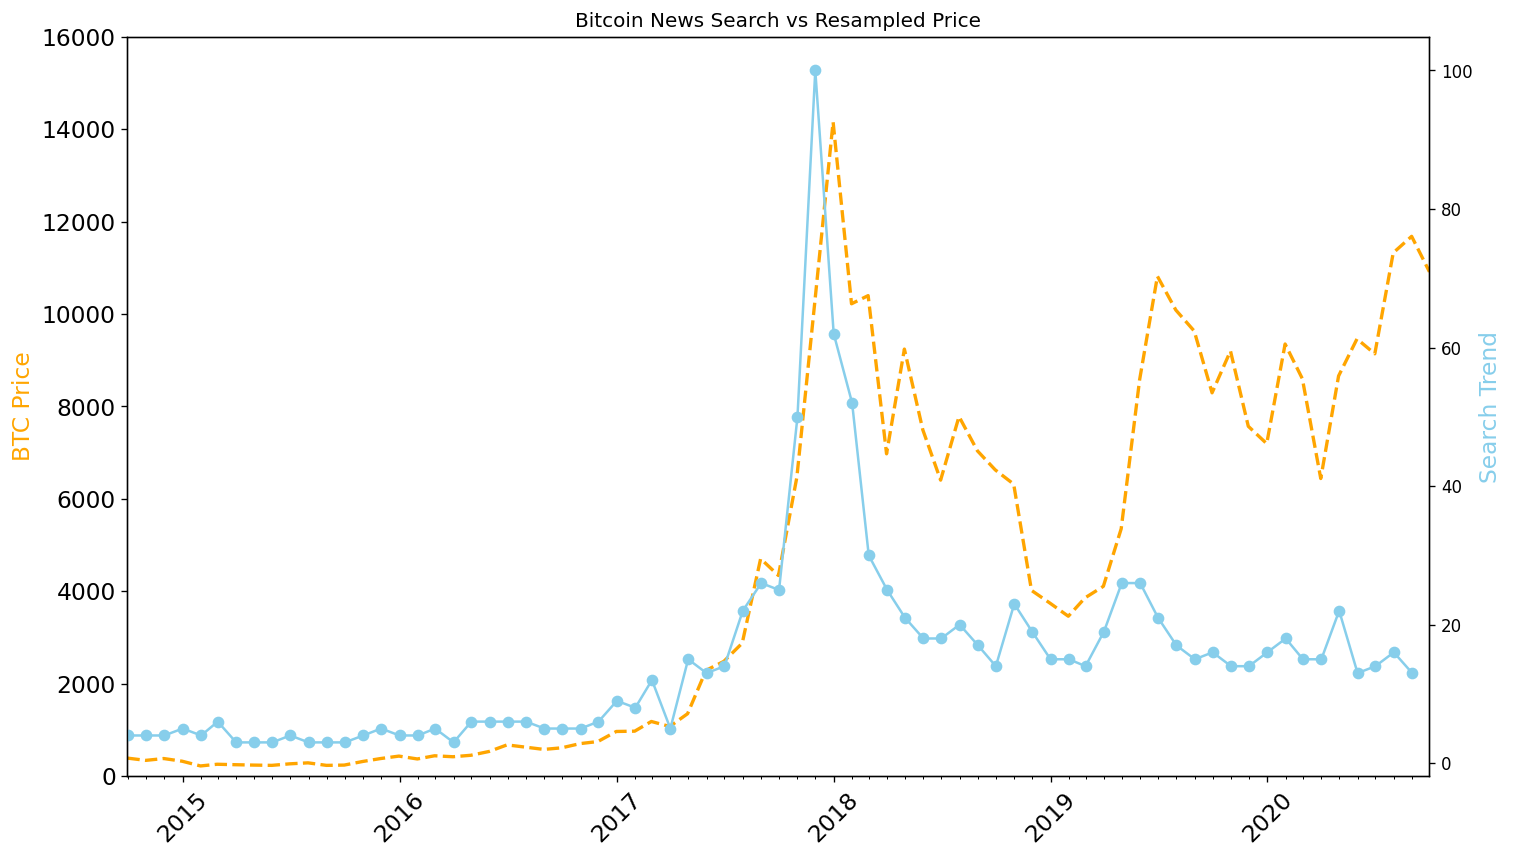

In [33]:
# Increase the figure size (e.g., to 14 by 8).
# Keep the chart looking sharp by changing the dots-per-inch or DPI value.
plt.figure(figsize=(14,8),dpi=120)
# Modify the chart title to read 'Bitcoin News Search vs Resampled Price'
plt.title('Bitcoin News Search vs Resampled Price')
# Rotate the text on the x-axis by 45 degrees.
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)


ax1 = plt.gca() #get current axis
ax2 = ax1.twinx()

# Change the y-axis label to 'BTC Price'
ax1.set_ylabel('BTC Price',color="orange", fontsize=14)
ax2.set_ylabel('Search Trend',color="skyblue", fontsize=14)

# Change the y- and x-axis limits to improve the appearance
ax1.set_ylim([0,16000])
ax1.set_xlim([df_btc_price_monthly.index.min(),df_btc_price_monthly.index.max()])


# Make the lines on the chart thicker.
# Investigate the linestyles to make the BTC price a dashed line
# Investigate the marker types to make the search datapoints little circles
ax1.plot(df_btc_price_monthly.index, df_btc_price_monthly.CLOSE,color="orange", linewidth=2, linestyle="dashed")
ax2.plot(df_btc_search.MONTH, df_btc_search.BTC_NEWS_SEARCH,color="skyblue", marker="o")

#format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# Finally use plt.show() to display the chart below the cell instead of relying on the automatic notebook output.
plt.show()


In [29]:
# Were big increases in searches for Bitcoin accompanied by big increases in the price?
# Only initially, then after the first crash the correlation was not apparent.

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

Plot the search for "unemployment benefits" against the unemployment rate.
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br>
5. Can you discern any seasonality in the searches? Is there a pattern?

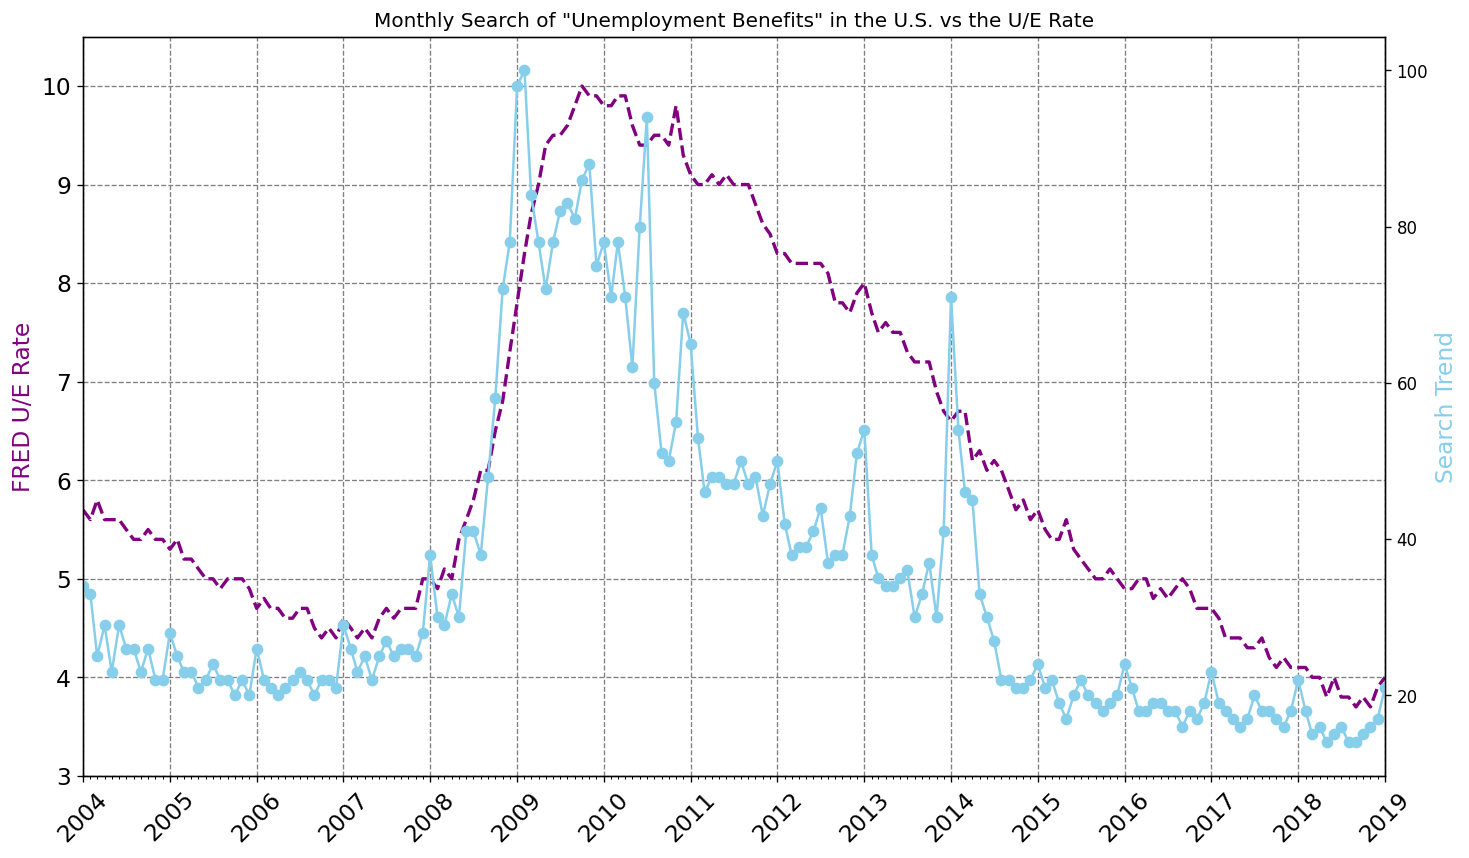

In [34]:
# Increase the figure size (e.g., to 14 by 8).
# Keep the chart looking sharp by changing the dots-per-inch or DPI value.
plt.figure(figsize=(14,8),dpi=120)
# Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate')
# Rotate the text on the x-axis by 45 degrees.
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
# Add a grey grid to the chart to better see the years and the U/E rate values. Use dashes for the line style
plt.grid(color="grey",linestyle='--')


ax1 = plt.gca() #get current axis
ax2 = ax1.twinx()

# Change the y-axis label to: FRED U/E Rate
ax1.set_ylabel('FRED U/E Rate',color="purple", fontsize=14)
ax2.set_ylabel('Search Trend',color="skyblue", fontsize=14)

#format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# Change the y- and x-axis limits to improve the appearance
ax1.set_ylim([3,10.5])
ax1.set_xlim([df_unemployment.MONTH.min(),df_unemployment.MONTH.max()])


# Make the lines on the chart thicker.
# Investigate the linestyles to make the BTC price a dashed line
# Investigate the marker types to make the search datapoints little circles
ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE,color="purple", linewidth=2, linestyle="--")
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH,color="skyblue", marker="o")


# Finally use plt.show() to display the chart below the cell instead of relying on the automatic notebook output.
plt.show()

# Can you discern any seasonality in the searches? Is there a pattern?


**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


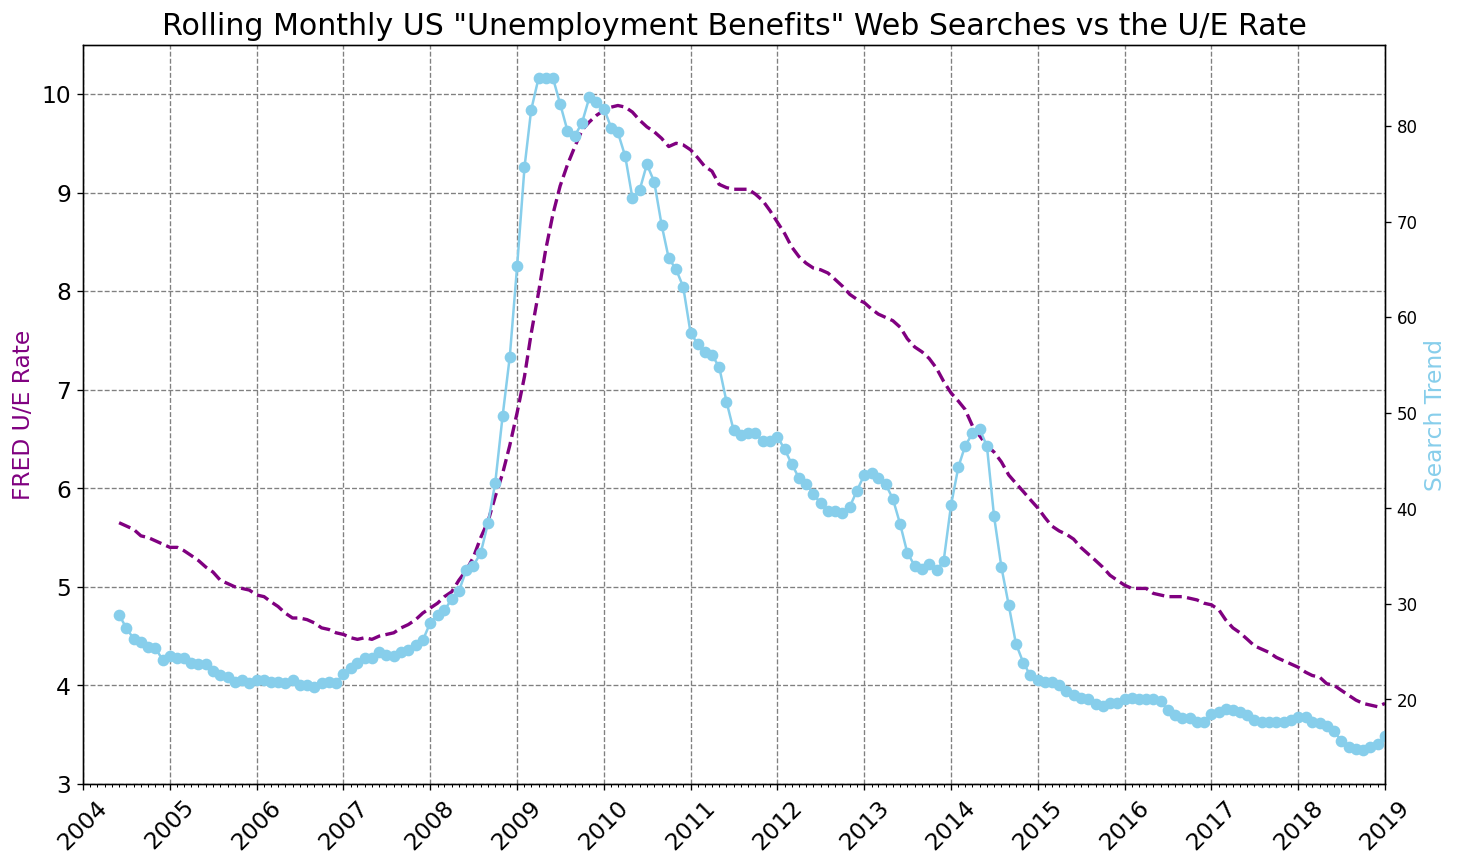

In [37]:
unemployment_roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH','UNRATE']].rolling(window=6).mean()
# Increase the figure size (e.g., to 14 by 8).
# Keep the chart looking sharp by changing the dots-per-inch or DPI value.
plt.figure(figsize=(14,8),dpi=120)
# Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate
plt.title('Rolling Monthly US "Unemployment Benefits" Web Searches vs the U/E Rate', fontsize=18)
# Rotate the text on the x-axis by 45 degrees.
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
# Add a grey grid to the chart to better see the years and the U/E rate values. Use dashes for the line style
plt.grid(color="grey",linestyle='--')


ax1 = plt.gca() #get current axis
ax2 = ax1.twinx()

# Change the y-axis label to: FRED U/E Rate
ax1.set_ylabel('FRED U/E Rate',color="purple", fontsize=14)
ax2.set_ylabel('Search Trend',color="skyblue", fontsize=14)

#format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# Change the y- and x-axis limits to improve the appearance
ax1.set_ylim([3,10.5])
ax1.set_xlim([df_unemployment.MONTH.min(),df_unemployment.MONTH.max()])


# Make the lines on the chart thicker.
# Investigate the linestyles to make the BTC price a dashed line
# Investigate the marker types to make the search datapoints little circles
ax1.plot(df_unemployment.MONTH, unemployment_roll_df.UNRATE,color="purple", linewidth=2, linestyle="--") #note the switch to unemployment_roll_df for the Y axis
ax2.plot(df_unemployment.MONTH, unemployment_roll_df.UE_BENEFITS_WEB_SEARCH,color="skyblue", marker="o") #note the switch to unemployment_roll_df for the Y axis


# Finally use plt.show() to display the chart below the cell instead of relying on the automatic notebook output.
plt.show()

# Can you discern any seasonality in the searches? Is there a pattern?
#this tells us that for searches of unemployment benefits, there is a spike before the unemployment rate goes up, and there is a decrease in searches before the unemployment rate goes down.
# Additionally, the search popularity goes down before the unemployment rate decreases. This indicates that the searches appear to be leading indicators for the unemployment rate (which
#is the lagging indicator). This analysis confirms the expectations for the Unemployment Benefits searches.

### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [38]:
#read the data and make a dataframe for 2020 data
df_ue_2020 = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')
#Convert the MONTH field to a datetime field and replace the current value.
df_ue_2020.MONTH = pd.to_datetime(df_ue_2020.MONTH)

In [39]:
#roll rate for 6 months on the new dataframe
df_ue_2020_Roll = df_ue_2020[['UE_BENEFITS_WEB_SEARCH','UNRATE']].rolling(window=6).mean()


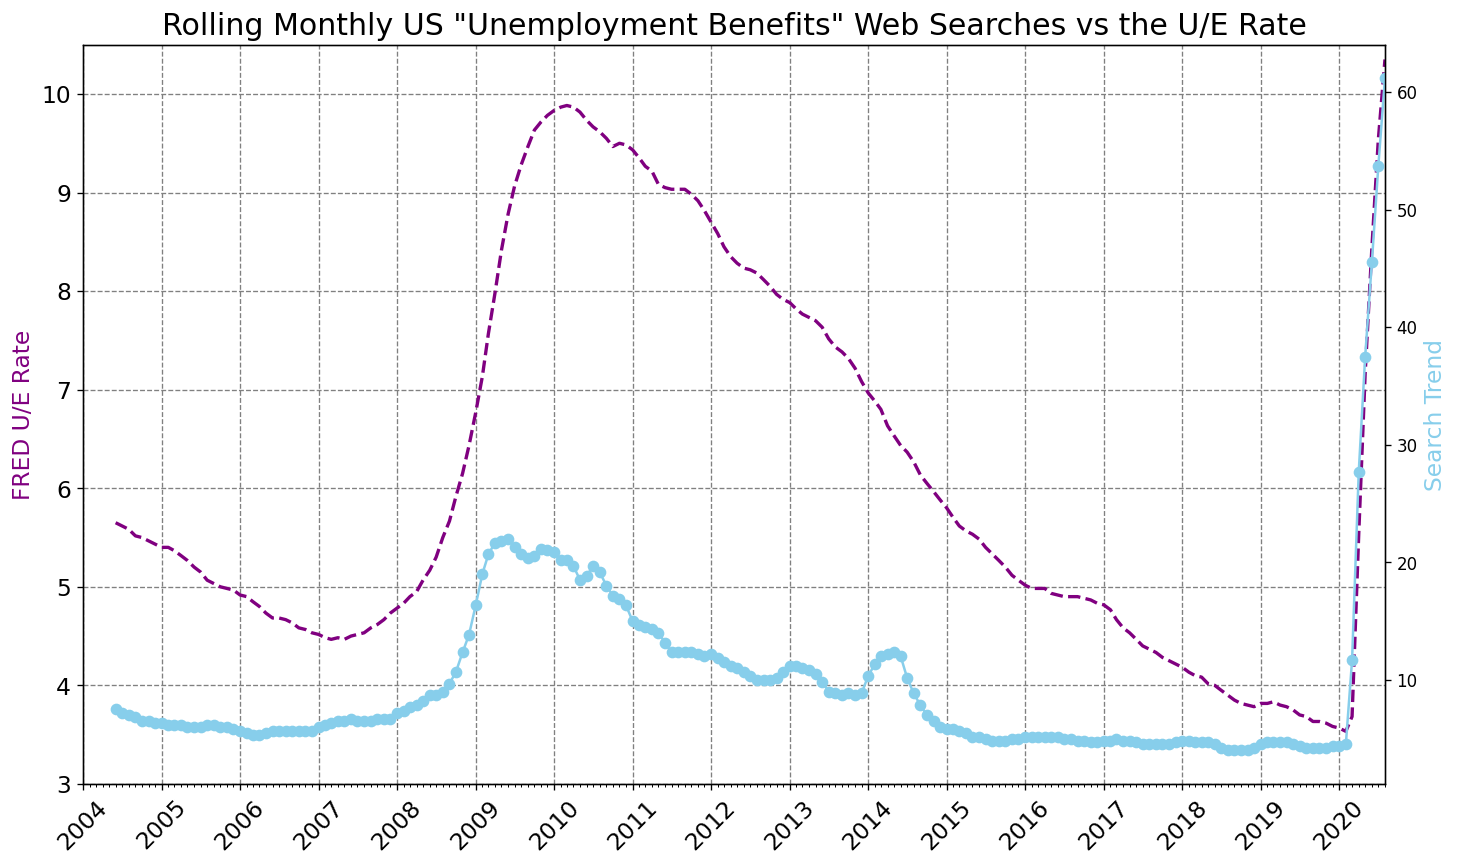

In [41]:
# Increase the figure size (e.g., to 14 by 8).
# Keep the chart looking sharp by changing the dots-per-inch or DPI value.
plt.figure(figsize=(14,8),dpi=120)
# Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate
plt.title('Rolling Monthly US "Unemployment Benefits" Web Searches vs the U/E Rate', fontsize=18)
# Rotate the text on the x-axis by 45 degrees.
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
# Add a grey grid to the chart to better see the years and the U/E rate values. Use dashes for the line style
plt.grid(color="grey",linestyle='--')


ax1 = plt.gca() #get current axis
ax2 = ax1.twinx()

# Change the y-axis label to: FRED U/E Rate
ax1.set_ylabel('FRED U/E Rate',color="purple", fontsize=14)
ax2.set_ylabel('Search Trend',color="skyblue", fontsize=14)

#format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# Change the y- and x-axis limits to improve the appearance
ax1.set_ylim([3,10.5])
ax1.set_xlim([df_ue_2020.MONTH.min(),df_ue_2020.MONTH.max()])


# Make the lines on the chart thicker.
# Investigate the linestyles to make the BTC price a dashed line
# Investigate the marker types to make the search datapoints little circles
ax1.plot(df_ue_2020.MONTH, df_ue_2020_Roll.UNRATE,color="purple", linewidth=2, linestyle="--") #note the switch to unemployment_roll_df for the Y axis
ax2.plot(df_ue_2020.MONTH, df_ue_2020_Roll.UE_BENEFITS_WEB_SEARCH,color="skyblue", marker="o") #note the switch to unemployment_roll_df for the Y axis


# Finally use plt.show() to display the chart below the cell instead of relying on the automatic notebook output.
plt.show()

# Can you discern any seasonality in the searches? Is there a pattern?
#this tells us that for searches of unemployment benefits, there is a spike before the unemployment rate goes up, and there is a decrease in searches before the unemployment rate goes down.
# Additionally, the search popularity goes down before the unemployment rate decreases. This indicates that the searches appear to be leading indicators for the unemployment rate (which
#is the lagging indicator). This analysis confirms the expectations for the Unemployment Benefits searches.

In [ ]:
#ANALYSIS:
# The unemployment levels spiked to previously unprecedented levels during Covid, but there were similarities represented with the searches preceding the spike in unemployment levels, if
# only by a marginal amount. Hopefully the recovery will be quicker than instances in the past.